On importe les librairies requises:

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


On lit le fichier csv et on affiche les 5 premieres lignes

In [ ]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


On prendra juqte deux variables dans le jeu de données  “LoanAmount” et “ApplicantIncome”. Ce qui va rendre l'implémentation simple à comprendre Visualisons les points de ces de variables:

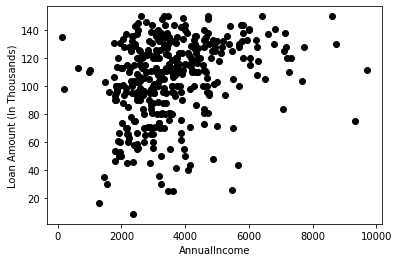

In [ ]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


Les étapes 1 et 2 de K-Means consiste à choisir le nombre de clusters (k) et à choisir aléatoirement les centroides de chaque cluster. On prendra 3 clusters et les visualiser de manière aléatoire:

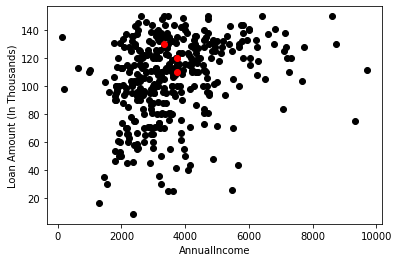

In [ ]:

#nombre clusters
K=3

# Selectionner les centroides aléatoirement
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Ici les points rouges représentent les 3 centroides de chaque cluster. 

Next,on va définir quelques conditions pour implémenter l'algorithme K-Means Clustering .

In [ ]:
# Step 3 - Attribuez tous les points au centroïde du cluster le plus proche
# Step 4 - Recalculer les centroïdes des clusters nouvellement formés
# Step 5 - Répétez les étapes 3 et 4

diff = 1
j=0


while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        #ED contient les distances euclidiennes des points
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            #calcul de la distance
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    #minimisation de la distance et creation des nouveaux clusters
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    #trouver le nouveau centroide 
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

396.8668952676584
219.94341147746565
251.91234802991147
229.73252920748018
216.9753660697176
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


Ces valeurs peuvent varier chaque fois que nous exécutons cette opération. Ici, nous arrêtons l’entraînement lorsque les centroïdes ne changent pas après deux itérations. Nous avons initialement défini le diff comme 1 et à l’intérieur de la boucle while, nous calculons ce diff comme la différence entre les centroïdes de l’itération précédente et l’itération actuelle.

Lorsque cette différence est de 0, nous arrêtons la formation. Visualisons maintenant les clusters que nous avons:

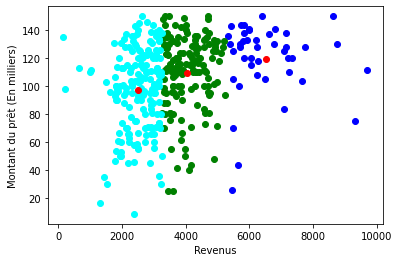

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Revenus')
plt.ylabel('Montant du prêt (En milliers)')
plt.show()

Génial! Ici, nous pouvons clairement visualiser trois clusters. Les points rouges représentent le centroïde de chaque cluster. J’espère que vous avez maintenant une compréhension claire du fonctionnement de K-Means.
